In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
fifa_data = pd.read_csv('C:/Users/MILAB/Desktop/자료/2022년 2학기/데이터마이닝/과제4/fifa_data_preprocessing.csv')
fifa_data.head()

,Unnamed: 0,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,2,3,4,0,5.0,94,94,4.0,110500000.0
1,1,27,1,2,1,1,4.0,91,93,1.0,72000000.0
2,2,31,2,3,4,1,5.0,91,91,3.0,80000000.0
3,3,32,1,2,2,1,4.0,91,91,3.0,51000000.0
4,4,25,1,3,1,1,3.0,90,93,1.0,68000000.0


#### Unnamed:0 삭제

In [3]:
fifa_data.pop("Unnamed: 0")
fifa_data.head()

,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,2,3,4,0,5.0,94,94,4.0,110500000.0
1,27,1,2,1,1,4.0,91,93,1.0,72000000.0
2,31,2,3,4,1,5.0,91,91,3.0,80000000.0
3,32,1,2,2,1,4.0,91,91,3.0,51000000.0
4,25,1,3,1,1,3.0,90,93,1.0,68000000.0


### Train Data 및 Test Data 분리 - 7 : 3으로
#### Random State는 17로 고정

In [4]:
X = fifa_data.iloc[:, :-1]
y = fifa_data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [6]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

,age,continent_num,contract_period,position_num,prefer_foot_num,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,1,2,0,1.0,69,69,2.0
1,24,1,1,2,0,1.0,66,70,2.0
2,23,1,4,3,1,1.0,71,74,3.0
3,26,1,3,3,1,1.0,67,68,3.0
4,25,1,2,2,0,1.0,69,72,2.0


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6252, 9)
(2680, 9)
(6252,)
(2680,)


### 1. Linear Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
print('Slope:', lin_reg.coef_)

Slope: [-398827.17316811    8001.85334655  339772.63325042   79324.13938133
  291811.33992462 6366302.05258255  503167.8123908   -58865.16087545
  -35296.96520292]


In [11]:
print('Intercept:', lin_reg.intercept_)

Intercept: -24987873.95985577


In [12]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred))
print('MSE Test', mean_squared_error(y_test, y_test_pred))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred))
print('MAE Test', mean_absolute_error(y_test, y_test_pred))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred))
print('R2 Score Test', r2_score(y_test, y_test_pred))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred))

MSE
MSE Train 11384464109531.379
MSE Test 13262641781230.375
------------------------------
RMSE
RMSE Train 3374087.1520355516
RMSE Test 3641791.012843869
------------------------------
MAE
MAE Train 1878575.0361935874
MAE Test 1905434.7243671922
------------------------------
R^2
R2 Score Train 0.6651468382931064
R2 Score Test 0.614245448222158
------------------------------
PCC
PCC Train
[[1.         0.81556535]
 [0.81556535 1.        ]]
PCC Test
[[1.        0.7837813]
 [0.7837813 1.       ]]


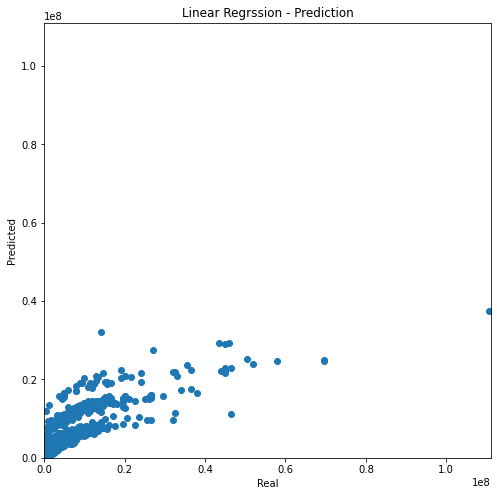

In [13]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Linear Regrssion - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred)
plt.show()

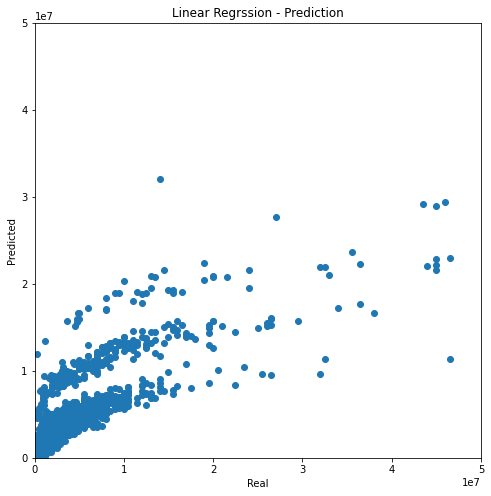

In [49]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Linear Regrssion - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred)
plt.show()

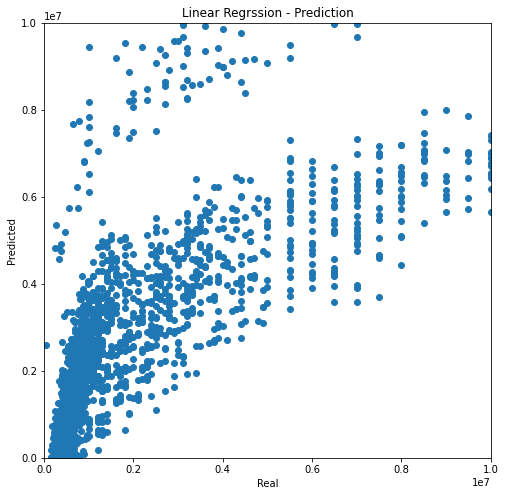

In [25]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Linear Regrssion - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred)
plt.show()

### 2. Support Vector Regression (kernel = 'linear')

In [14]:
from sklearn.svm import SVR
svl = SVR(kernel='linear', C=1.0, epsilon=0.1)
svl.fit(X_train, y_train)
y_train_pred_svl = svl.predict(X_train)
y_test_pred_svl = svl.predict(X_test)

In [15]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_svl))
print('MSE Test', mean_squared_error(y_test, y_test_pred_svl))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_svl)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_svl)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_svl))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_svl))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_svl))
print('R2 Score Test', r2_score(y_test, y_test_pred_svl))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_svl))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_svl))

MSE
MSE Train 35212456524619.555
MSE Test 35608844653653.97
------------------------------
RMSE
RMSE Train 5934008.470218049
RMSE Test 5967314.693700506
------------------------------
MAE
MAE Train 2146380.0828534868
MAE Test 2117210.654850746
------------------------------
R^2
R2 Score Train -0.035709918823816134
R2 Score Test -0.03571174847962899
------------------------------
PCC
PCC Train
[[1.         0.69932685]
 [0.69932685 1.        ]]
PCC Test
[[1.         0.68223561]
 [0.68223561 1.        ]]


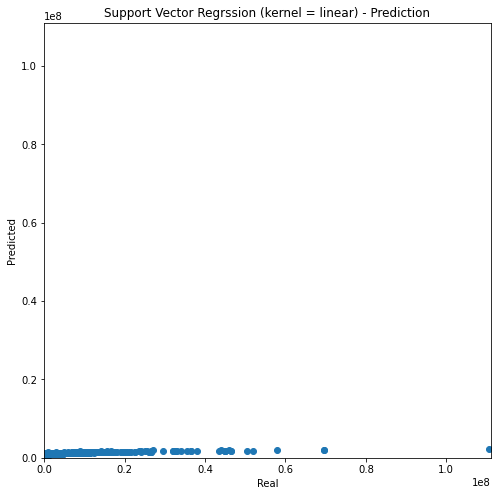

In [19]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = linear) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_svl)
plt.show()

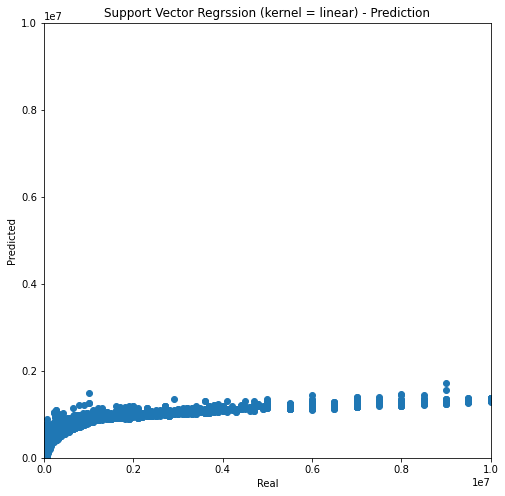

In [26]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = linear) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_svl)
plt.show()

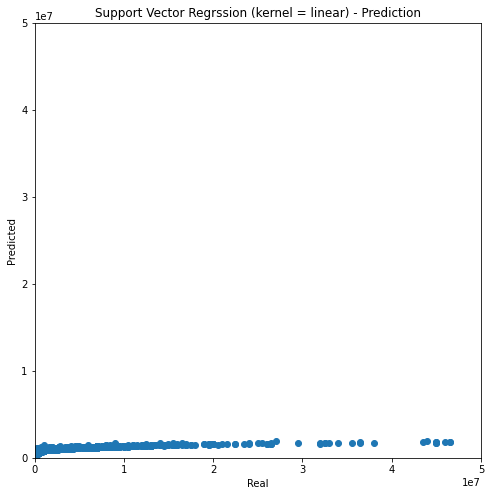

In [50]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = linear) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_svl)
plt.show()

### 3. Support Vector Regression (kernel = 'rbf')

In [20]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)
y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

In [21]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_svr))
print('MSE Test', mean_squared_error(y_test, y_test_pred_svr))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_svr)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_svr)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_svr))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_svr))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_svr))
print('R2 Score Test', r2_score(y_test, y_test_pred_svr))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_svr))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_svr))

MSE
MSE Train 37931558970910.7
MSE Test 38251488775944.23
------------------------------
RMSE
RMSE Train 6158860.200630528
RMSE Test 6184778.79765673
------------------------------
MAE
MAE Train 2390867.7588231517
MAE Test 2358960.5017299196
------------------------------
R^2
R2 Score Train -0.11568733738172998
R2 Score Test -0.11257516797913825
------------------------------
PCC
PCC Train
[[1.         0.68815094]
 [0.68815094 1.        ]]
PCC Test
[[1.        0.6696301]
 [0.6696301 1.       ]]


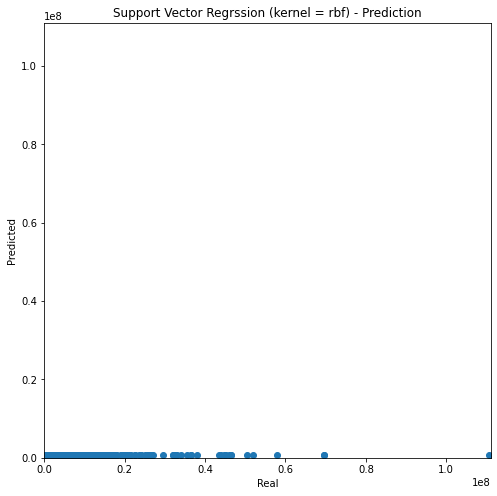

In [24]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = rbf) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_svr)
plt.show()

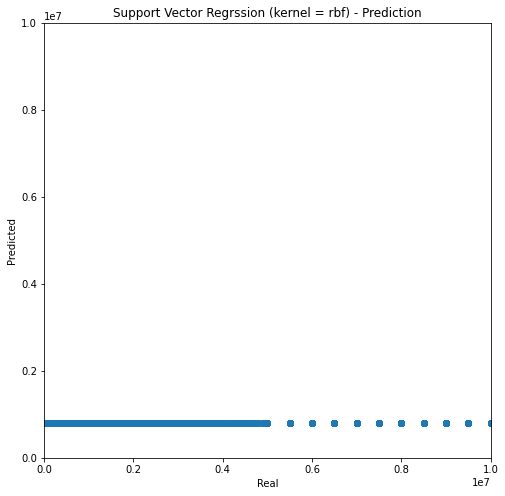

In [27]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = rbf) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_svr)
plt.show()

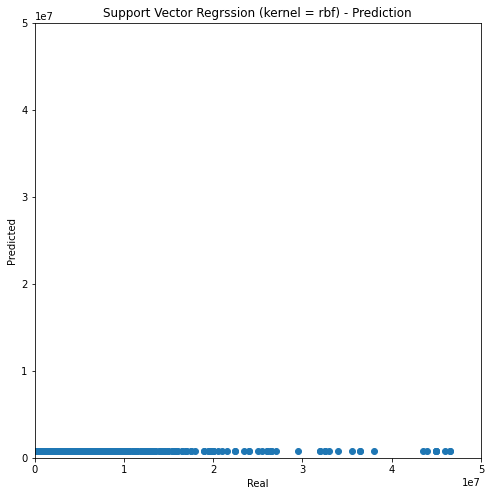

In [51]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Support Vector Regrssion (kernel = rbf) - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위

# 110500000
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_svr)
plt.show()

### 4. MLP Regressor

In [29]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train, y_train)
y_train_pred_mlp = mlp_regressor.predict(X_train)
y_test_pred_mlp = mlp_regressor.predict(X_test)

In [30]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_mlp))
print('MSE Test', mean_squared_error(y_test, y_test_pred_mlp))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_mlp)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_mlp)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_mlp))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_mlp))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_mlp))
print('R2 Score Test', r2_score(y_test, y_test_pred_mlp))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_mlp))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_mlp))

MSE
MSE Train 39111993898250.02
MSE Test 39426702898076.945
------------------------------
RMSE
RMSE Train 6253958.258435215
RMSE Test 6279068.63301214
------------------------------
MAE
MAE Train 2430672.3685644553
MAE Test 2410216.881272387
------------------------------
R^2
R2 Score Train -0.15040766886205725
R2 Score Test -0.14675721137624476
------------------------------
PCC
PCC Train
[[1.         0.66895918]
 [0.66895918 1.        ]]
PCC Test
[[1.         0.65690738]
 [0.65690738 1.        ]]


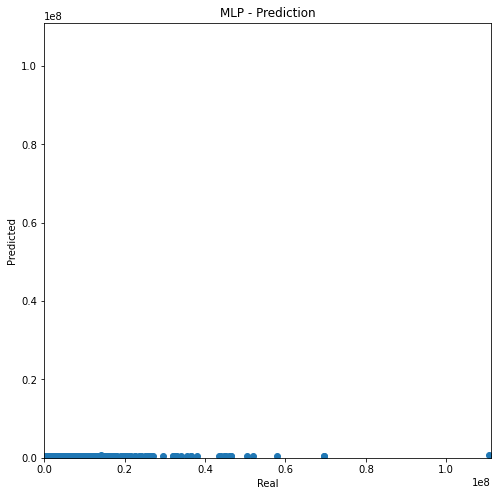

In [31]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('MLP - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_mlp)
plt.show()

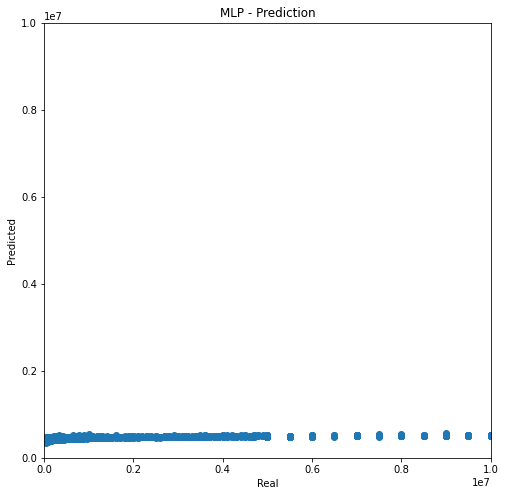

In [32]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('MLP - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_mlp)
plt.show()

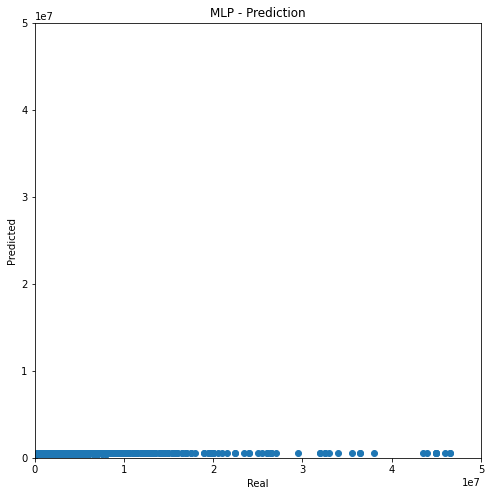

In [52]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('MLP - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_mlp)
plt.show()

### 5. KNN Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

# Default는 n_neighbors = 5
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

In [34]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_knn))
print('MSE Test', mean_squared_error(y_test, y_test_pred_knn))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_knn)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_knn)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_knn))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_knn))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_knn))
print('R2 Score Test', r2_score(y_test, y_test_pred_knn))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_knn))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_knn))

MSE
MSE Train 413333129078.6948
MSE Test 1579604380970.1492
------------------------------
RMSE
RMSE Train 642909.8918811989
RMSE Test 1256823.1303449778
------------------------------
MAE
MAE Train 195907.06973768395
MAE Test 267272.01492537314
------------------------------
R^2
R2 Score Train 0.9878425630070433
R2 Score Test 0.9540559422460004
------------------------------
PCC
PCC Train
[[1.         0.99402823]
 [0.99402823 1.        ]]
PCC Test
[[1.         0.97826736]
 [0.97826736 1.        ]]


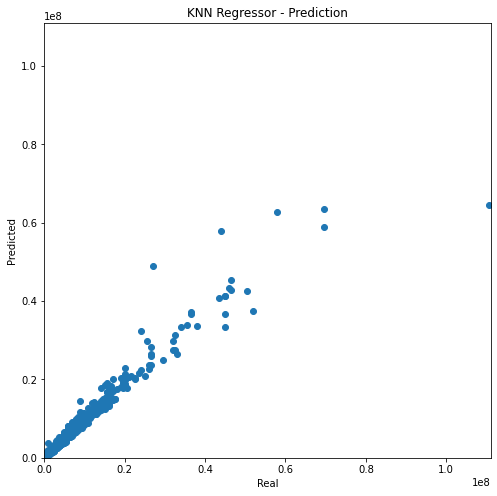

In [35]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('KNN Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_knn)
plt.show()

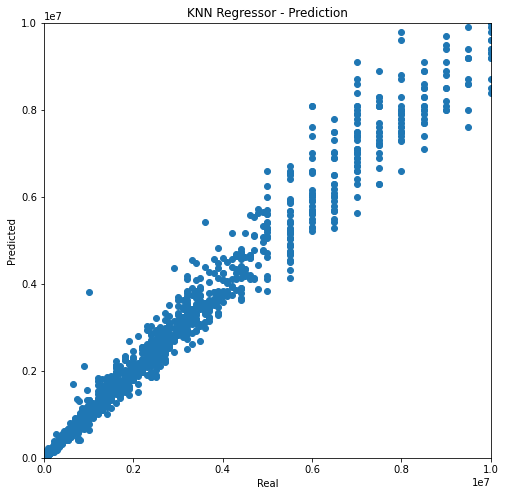

In [36]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('KNN Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])

plt.scatter(y_test, y_test_pred_knn)
plt.show()

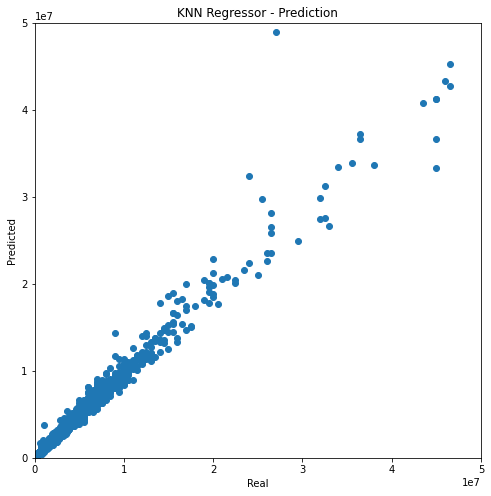

In [40]:
# 5*1e7

# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('KNN Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_knn)
plt.show()

### 6. Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Default로 n_estimators는 10이었으나 최근 100으로 변경.
# 다만 일단 여기서는 10으로 설정
random_forest_regressor = RandomForestRegressor(n_estimators=10)
random_forest_regressor.fit(X_train, y_train)
y_train_pred_rf = random_forest_regressor.predict(X_train)
y_test_pred_rf = random_forest_regressor.predict(X_test)

In [38]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_rf))
print('MSE Test', mean_squared_error(y_test, y_test_pred_rf))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_rf))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_rf))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_rf))
print('R2 Score Test', r2_score(y_test, y_test_pred_rf))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_rf))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_rf))

MSE
MSE Train 126051281125.87714
MSE Test 1098996183756.2988
------------------------------
RMSE
RMSE Train 355037.0137406481
RMSE Test 1048330.1883263206
------------------------------
MAE
MAE Train 74642.18173993846
MAE Test 191866.6040334044
------------------------------
R^2
R2 Score Train 0.9962924324222809
R2 Score Test 0.9680348163462844
------------------------------
PCC
PCC Train
[[1.         0.99815619]
 [0.99815619 1.        ]]
PCC Test
[[1.        0.9850042]
 [0.9850042 1.       ]]


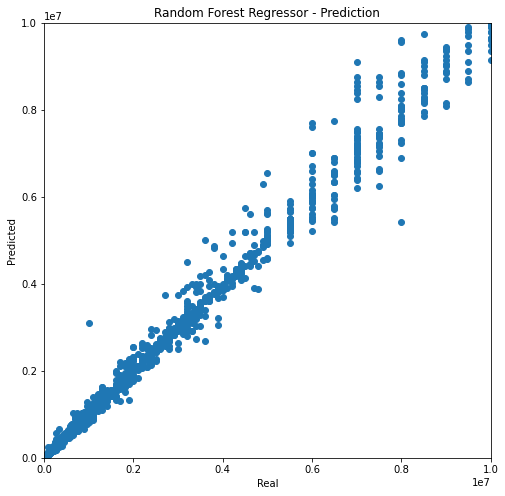

In [41]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Random Forest Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_rf)
plt.show()

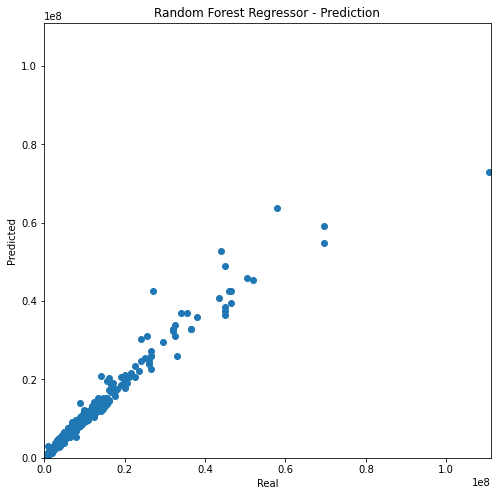

In [42]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Random Forest Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_rf)
plt.show()

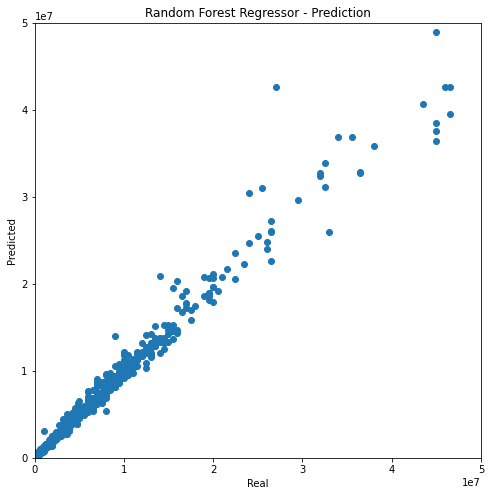

In [43]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Random Forest Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_rf)
plt.show()

### 7. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=17)
decision_tree_regressor.fit(X_train, y_train)
y_train_pred_dt = decision_tree_regressor.predict(X_train)
y_test_pred_dt = decision_tree_regressor.predict(X_test)

In [45]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_dt))
print('MSE Test', mean_squared_error(y_test, y_test_pred_dt))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_dt))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_dt))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_dt))
print('R2 Score Test', r2_score(y_test, y_test_pred_dt))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_dt))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_dt))

MSE
MSE Train 386340371.081254
MSE Test 1304155297730.0994
------------------------------
RMSE
RMSE Train 19655.543011610083
RMSE Test 1141996.189892987
------------------------------
MAE
MAE Train 1565.8989123480487
MAE Test 223585.5099502488
------------------------------
R^2
R2 Score Train 0.9999886365055477
R2 Score Test 0.9620675993046461
------------------------------
PCC
PCC Train
[[1.         0.99999432]
 [0.99999432 1.        ]]
PCC Test
[[1.         0.98171373]
 [0.98171373 1.        ]]


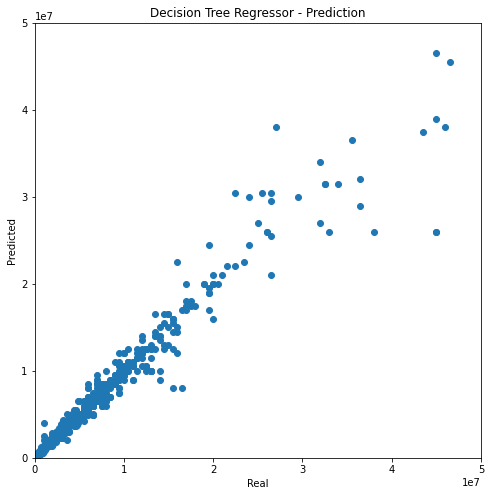

In [56]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Decision Tree Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_dt)
plt.show()

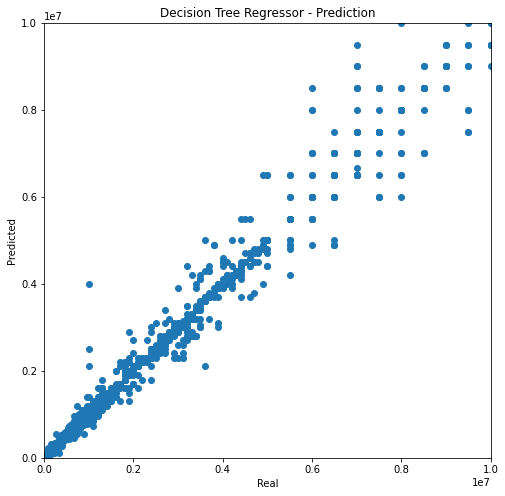

In [57]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Decision Tree Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_dt)
plt.show()

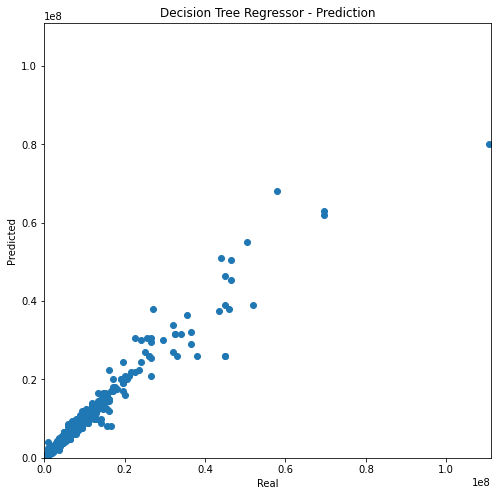

In [58]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Decision Tree Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_dt)
plt.show()

### 8. XGBoost

In [54]:
import xgboost as xgb
from xgboost import XGBRegressor

xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_train_pred_xgb = xg_reg.predict(X_train)
y_test_pred_xgb = xg_reg.predict(X_test)

In [55]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_xgb))
print('MSE Test', mean_squared_error(y_test, y_test_pred_xgb))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_xgb))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_xgb))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_xgb))
print('R2 Score Test', r2_score(y_test, y_test_pred_xgb))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_xgb))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_xgb))

MSE
MSE Train 15041081717.036697
MSE Test 918087052469.5392
------------------------------
RMSE
RMSE Train 122642.08786968973
RMSE Test 958168.5929258687
------------------------------
MAE
MAE Train 60969.203846419536
MAE Test 174044.31850953744
------------------------------
R^2
R2 Score Train 0.99955759412828
R2 Score Test 0.9732967032315056
------------------------------
PCC
PCC Train
[[1.         0.99977877]
 [0.99977877 1.        ]]
PCC Test
[[1.         0.98698149]
 [0.98698149 1.        ]]


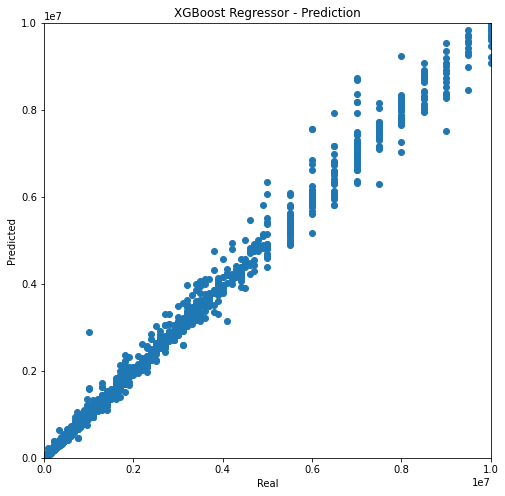

In [59]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('XGBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_xgb)
plt.show()

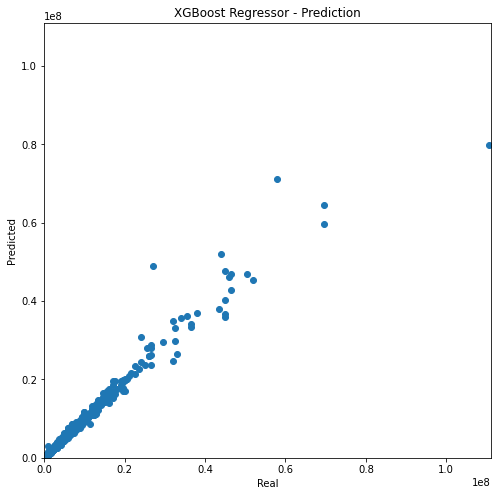

In [60]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('XGBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_xgb)
plt.show()

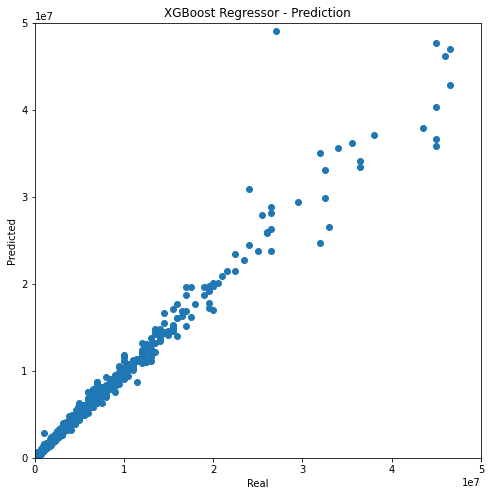

In [61]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('XGBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_xgb)
plt.show()

### 9. LightGBM

In [62]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train, y_train)
y_train_pred_lgbm = lgbm_reg.predict(X_train)
y_test_pred_lgbm = lgbm_reg.predict(X_test)

In [63]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_lgbm))
print('MSE Test', mean_squared_error(y_test, y_test_pred_lgbm))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_lgbm))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_lgbm))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_lgbm))
print('R2 Score Test', r2_score(y_test, y_test_pred_lgbm))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_lgbm))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_lgbm))

MSE
MSE Train 395262475907.71783
MSE Test 1398773912990.4224
------------------------------
RMSE
RMSE Train 628699.0344415345
RMSE Test 1182697.7268052993
------------------------------
MAE
MAE Train 138137.62491247902
MAE Test 183275.4713867211
------------------------------
R^2
R2 Score Train 0.9883740781745728
R2 Score Test 0.9593155411459736
------------------------------
PCC
PCC Train
[[1.         0.99417166]
 [0.99417166 1.        ]]
PCC Test
[[1.         0.98028994]
 [0.98028994 1.        ]]


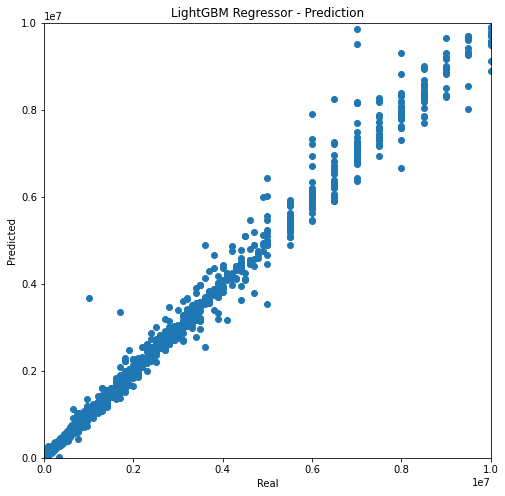

In [64]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LightGBM Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lgbm)
plt.show()

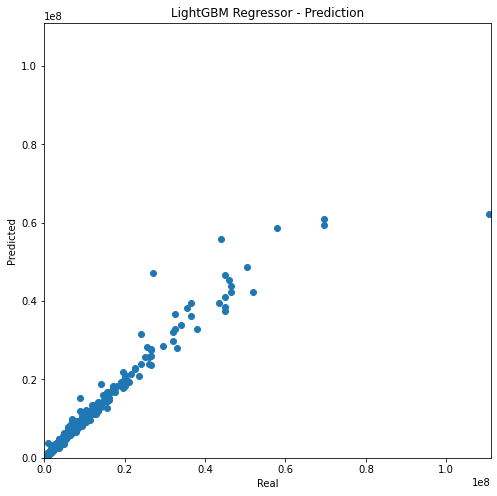

In [65]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LightGBM Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lgbm)
plt.show()

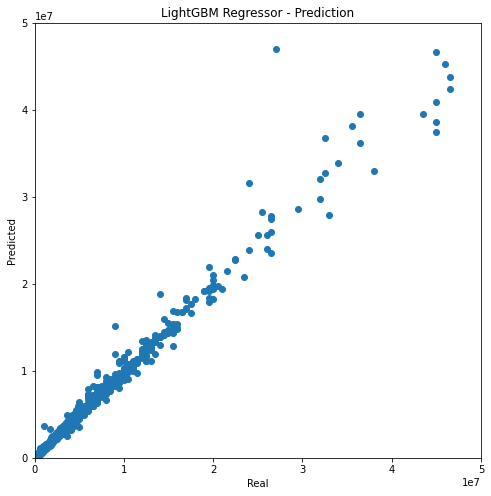

In [66]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LightGBM Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lgbm)
plt.show()

### 10. CatBoost

In [67]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train, y_train)
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

Learning rate set to 0.054695
0:	learn: 5581270.9179404	total: 198ms	remaining: 3m 17s
1:	learn: 5358396.9927206	total: 199ms	remaining: 1m 39s
2:	learn: 5120932.0079306	total: 200ms	remaining: 1m 6s
3:	learn: 4903505.7622887	total: 201ms	remaining: 50.1s
4:	learn: 4689278.4489095	total: 203ms	remaining: 40.3s
5:	learn: 4483793.6345870	total: 204ms	remaining: 33.8s
6:	learn: 4304516.1065672	total: 206ms	remaining: 29.2s
7:	learn: 4118727.5286650	total: 207ms	remaining: 25.7s
8:	learn: 3939743.0730236	total: 209ms	remaining: 23s
9:	learn: 3777527.0201788	total: 210ms	remaining: 20.8s
10:	learn: 3625808.4637229	total: 211ms	remaining: 19s
11:	learn: 3479179.7874388	total: 212ms	remaining: 17.5s
12:	learn: 3339775.6925555	total: 214ms	remaining: 16.2s
13:	learn: 3198352.3399222	total: 215ms	remaining: 15.1s
14:	learn: 3072397.8605292	total: 217ms	remaining: 14.2s
15:	learn: 2956763.1329046	total: 218ms	remaining: 13.4s
16:	learn: 2846998.3602722	total: 220ms	remaining: 12.7s
17:	learn: 27

In [68]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_cat))
print('MSE Test', mean_squared_error(y_test, y_test_pred_cat))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_cat)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_cat)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_cat))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_cat))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_cat))
print('R2 Score Test', r2_score(y_test, y_test_pred_cat))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_cat))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_cat))

MSE
MSE Train 29215861713.580463
MSE Test 858570240415.5354
------------------------------
RMSE
RMSE Train 170926.4804340757
RMSE Test 926590.6541809795
------------------------------
MAE
MAE Train 80288.93179949811
MAE Test 144962.3079952885
------------------------------
R^2
R2 Score Train 0.9991406689350802
R2 Score Test 0.975027797348036
------------------------------
PCC
PCC Train
[[1.         0.99957034]
 [0.99957034 1.        ]]
PCC Test
[[1.       0.988858]
 [0.988858 1.      ]]


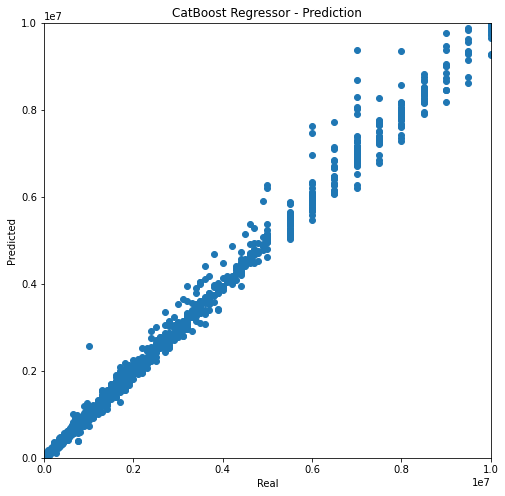

In [69]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()

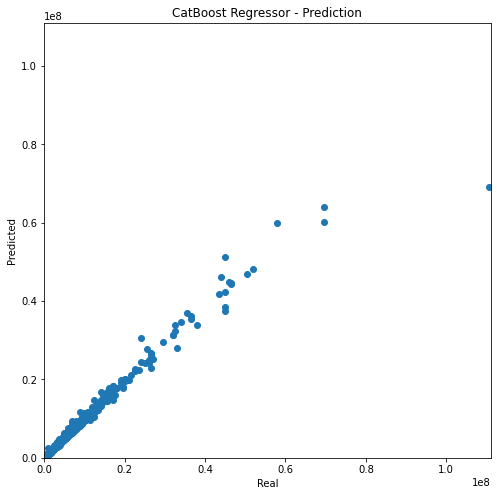

In [70]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()

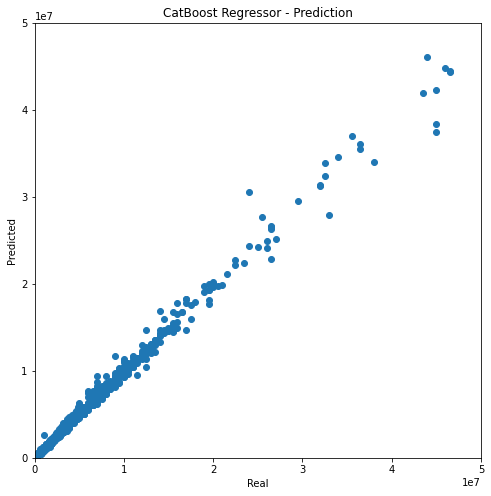

In [71]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('CatBoost Regressor - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_cat)
plt.show()

### 11. LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_train_pred_lda = lda_model.predict(X_train)
y_test_pred_lda = lda_model.predict(X_test)


In [73]:
print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred_lda))
print('MSE Test', mean_squared_error(y_test, y_test_pred_lda))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred_lda)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred_lda)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred_lda))
print('MAE Test', mean_absolute_error(y_test, y_test_pred_lda))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred_lda))
print('R2 Score Test', r2_score(y_test, y_test_pred_lda))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred_lda))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred_lda))

MSE
MSE Train 1093192578374.92
MSE Test 2074627490671.6418
------------------------------
RMSE
RMSE Train 1045558.5006946862
RMSE Test 1440356.7234097398
------------------------------
MAE
MAE Train 370857.32565579016
MAE Test 463080.22388059704
------------------------------
R^2
R2 Score Train 0.9678457424344745
R2 Score Test 0.9396577988781519
------------------------------
PCC
PCC Train
[[1.         0.98434637]
 [0.98434637 1.        ]]
PCC Test
[[1.         0.96971996]
 [0.96971996 1.        ]]


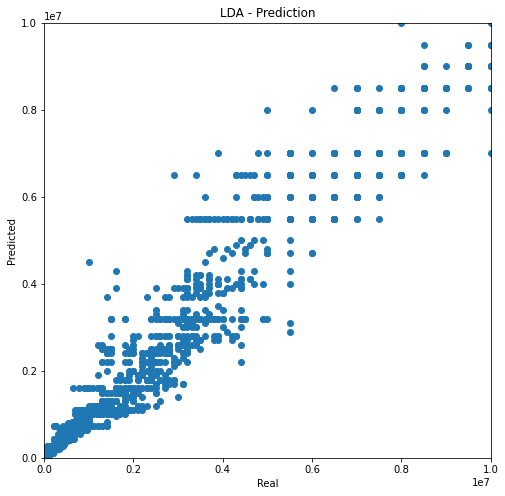

In [79]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LDA - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
plt.xlim([0, 1e7])
plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lda)
plt.show()

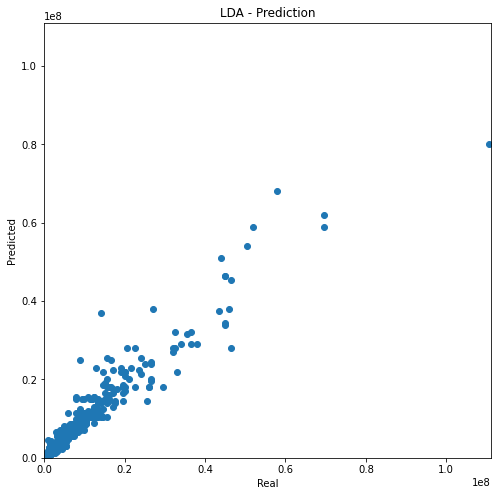

In [78]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LDA - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
plt.xlim([0, 111000000])
plt.ylim([0, 111000000])
# plt.xlim([0, 5*1e7])
# plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lda)
plt.show()

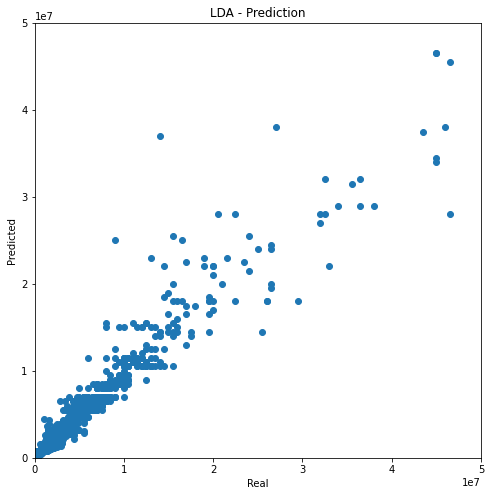

In [77]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('LDA - Prediction')
plt.xlabel('Real')
plt.ylabel('Predicted')

# X축, Y축 범위
# plt.xlim([0, 1e7])
# plt.ylim([0, 1e7])
# plt.xlim([0, 111000000])
# plt.ylim([0, 111000000])
plt.xlim([0, 5*1e7])
plt.ylim([0, 5*1e7])

plt.scatter(y_test, y_test_pred_lda)
plt.show()

### 12. QDA

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_train_pred_qda = qda_model.predict(X_train)
y_test_pred_qda = qda_model.predict(X_test)

ValueError: y has only 1 sample in class 23000000.0, covariance is ill defined.

## Cross-Validation (CV)
- https://www.statology.org/k-fold-cross-validation-in-python/
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

- lin_reg
- svl
- svr
- mlp_regressor
- knn_regressor
- random_forest_regressor
- decision_tree_regressor
- xg_reg
- lgbm_reg
- cat_reg
- lda_model

In [88]:
# RMSE : neg_root_mean_squared_error
# MAE : neg_mean_absolute_error
# R^2 Score : r2
cv = KFold(n_splits=5, random_state=17, shuffle=True)

In [96]:
# 1. Linear Regression
lin_reg_cv_rmse = cross_val_score(lin_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
lin_reg_cv_mae = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
lin_reg_cv_r2 = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=cv)
print(lin_reg_cv_rmse)
print(lin_reg_cv_mae)
print(lin_reg_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(lin_reg_cv_rmse)))
print('MAE :', np.mean(np.absolute(lin_reg_cv_mae)))
print('R2 Score :', np.mean(np.absolute(lin_reg_cv_r2)))

[-3560940.95683008 -3112184.2185346  -2800888.91853466 -3725851.46291075
 -3622509.82838731]
[-1972712.07147613 -1829461.54382705 -1766563.59939449 -1995884.96716948
 -1844395.59378699]
[0.67279793 0.6699535  0.70206309 0.6259238  0.65777307]
------------------------------
RMSE : 3364475.077039478
MAE : 1881803.5551308282
R2 Score : 0.6657022765637624


In [97]:
# 2. Support Vector Regression (kernel = 'linear')
svl_cv_rmse = cross_val_score(svl, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
svl_cv_mae = cross_val_score(svl, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
svl_cv_r2 = cross_val_score(svl, X_train, y_train, scoring='r2', cv=cv)
print(svl_cv_rmse)
print(svl_cv_mae)
print(svl_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(svl_cv_rmse)))
print('MAE :', np.mean(np.absolute(svl_cv_mae)))
print('R2 Score :', np.mean(np.absolute(svl_cv_r2)))

[-6428241.53259562 -5548608.37304088 -5271523.63082831 -6216376.22450482
 -6323828.54111044]
[-2446086.84092726 -2079236.4332534  -2057294.2024     -2151512.6592
 -2214155.77430044]
[-0.06627905 -0.04908986 -0.05537025 -0.04131851 -0.04293012]
------------------------------
RMSE : 5957715.660416016
MAE : 2189657.18201622
R2 Score : 0.05099755783948665


In [98]:
# 3. Support Vector Regression (kernel = 'rbf')
svr_cv_rmse = cross_val_score(svr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
svr_cv_mae = cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
svr_cv_r2 = cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv)
print(svr_cv_rmse)
print(svr_cv_mae)
print(svr_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(svr_cv_rmse)))
print('MAE :', np.mean(np.absolute(svr_cv_mae)))
print('R2 Score :', np.mean(np.absolute(svr_cv_r2)))

[-6621287.99594028 -5730225.42950228 -5455541.40636713 -6395661.82548068
 -6497294.96088518]
[-2654179.13141575 -2278602.04685154 -2256552.8718814  -2349997.09409038
 -2416276.16735025]
[-0.13128352 -0.11889146 -0.13033778 -0.10224971 -0.10093126]
------------------------------
RMSE : 6140002.323635111
MAE : 2391121.462317863
R2 Score : 0.11673874499329795


In [99]:
# 4. MLP Regressor
mlp_regressor_cv_rmse = cross_val_score(mlp_regressor, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
mlp_regressor_cv_mae = cross_val_score(mlp_regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
mlp_regressor_cv_r2 = cross_val_score(mlp_regressor, X_train, y_train, scoring='r2', cv=cv)
print(mlp_regressor_cv_rmse)
print(mlp_regressor_cv_mae)
print(mlp_regressor_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(mlp_regressor_cv_rmse)))
print('MAE :', np.mean(np.absolute(mlp_regressor_cv_mae)))
print('R2 Score :', np.mean(np.absolute(mlp_regressor_cv_r2)))

[-6792584.58731503 -5877997.936421   -5606076.11419243 -6530995.19169343
 -6623123.39776565]
[-2814463.97875363 -2412005.78137837 -2371855.80910028 -2482506.74768994
 -2471803.66764092]
[-0.18162918 -0.18470798 -0.19085828 -0.14567654 -0.14909993]
------------------------------
RMSE : 6286155.445477506
MAE : 2510527.1969126286
R2 Score : 0.1703943821517881


In [100]:
# 5. KNN
knn_regressor_cv_rmse = cross_val_score(knn_regressor, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
knn_regressor_cv_mae = cross_val_score(knn_regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
knn_regressor_cv_r2 = cross_val_score(knn_regressor, X_train, y_train, scoring='r2', cv=cv)
print(knn_regressor_cv_rmse)
print(knn_regressor_cv_mae)
print(knn_regressor_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(knn_regressor_cv_rmse)))
print('MAE :', np.mean(np.absolute(knn_regressor_cv_mae)))
print('R2 Score :', np.mean(np.absolute(knn_regressor_cv_r2)))

[ -742910.08640536 -1110746.43240045  -616405.61905291  -769302.59170238
  -912864.99856222]
[-269991.20703437 -267763.38928857 -228532.         -242005.6
 -261484.8       ]
[0.98575839 0.95795887 0.98557002 0.9840521  0.97826758]
------------------------------
RMSE : 830445.945624663
MAE : 253955.3992645883
R2 Score : 0.9783213924988244


In [101]:
# 6. Random Forest
random_forest_regressor_cv_rmse = cross_val_score(random_forest_regressor, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
random_forest_regressor_cv_mae = cross_val_score(random_forest_regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
random_forest_regressor_cv_r2 = cross_val_score(random_forest_regressor, X_train, y_train, scoring='r2', cv=cv)
print(random_forest_regressor_cv_rmse)
print(random_forest_regressor_cv_mae)
print(random_forest_regressor_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(random_forest_regressor_cv_rmse)))
print('MAE :', np.mean(np.absolute(random_forest_regressor_cv_mae)))
print('R2 Score :', np.mean(np.absolute(random_forest_regressor_cv_r2)))

[ -704895.15571463 -1429509.23854025  -730842.86271321  -753380.55445286
 -1095904.27913922]
[-199184.60374557 -230473.13260503 -193767.31460317 -213784.8952381
 -210318.76666667]
[0.99028225 0.90597917 0.98628468 0.97549986 0.97520455]
------------------------------
RMSE : 942906.418112034
MAE : 209505.74257170767
R2 Score : 0.9666501019039868


In [102]:
# 7. Decision Tree
decision_tree_regressor_cv_rmse = cross_val_score(decision_tree_regressor, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
decision_tree_regressor_cv_mae = cross_val_score(decision_tree_regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
decision_tree_regressor_cv_r2 = cross_val_score(decision_tree_regressor, X_train, y_train, scoring='r2', cv=cv)
print(decision_tree_regressor_cv_rmse)
print(decision_tree_regressor_cv_mae)
print(decision_tree_regressor_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(decision_tree_regressor_cv_rmse)))
print('MAE :', np.mean(np.absolute(decision_tree_regressor_cv_mae)))
print('R2 Score :', np.mean(np.absolute(decision_tree_regressor_cv_r2)))

[-1108808.86860275 -1332538.45710918  -907365.73693057 -1223147.06733628
 -1577157.06749694]
[-249457.10098588 -243486.54409805 -215860.66666667 -249271.33333333
 -274534.66666667]
[0.96827513 0.93949322 0.9687322  0.95968503 0.93512985]
------------------------------
RMSE : 1229803.439495144
MAE : 246522.06235011993
R2 Score : 0.9542630847053093


In [103]:
# 8. XGBoost
xg_reg_cv_rmse = cross_val_score(xg_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
xg_reg_cv_mae = cross_val_score(xg_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
xg_reg_cv_r2 = cross_val_score(xg_reg, X_train, y_train, scoring='r2', cv=cv)
print(xg_reg_cv_rmse)
print(xg_reg_cv_mae)
print(xg_reg_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(xg_reg_cv_rmse)))
print('MAE :', np.mean(np.absolute(xg_reg_cv_mae)))
print('R2 Score :', np.mean(np.absolute(xg_reg_cv_r2)))

[ -905354.8507775  -1745462.86702436  -555169.85599825 -1060452.81949343
 -1038842.27105646]
[-195112.72309574 -217274.64403126 -152171.28896729 -191312.13762891
 -194306.48483423]
[0.97884933 0.89618365 0.98829465 0.96969658 0.97185545]
------------------------------
RMSE : 1061056.5328699993
MAE : 190035.4557114843
R2 Score : 0.9609759312244586


In [104]:
# 9. LightGBM
lgbm_reg_cv_rmse = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
lgbm_reg_cv_mae = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
lgbm_reg_cv_r2 = cross_val_score(lgbm_reg, X_train, y_train, scoring='r2', cv=cv)
print(lgbm_reg_cv_rmse)
print(lgbm_reg_cv_mae)
print(lgbm_reg_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(lgbm_reg_cv_rmse)))
print('MAE :', np.mean(np.absolute(lgbm_reg_cv_mae)))
print('R2 Score :', np.mean(np.absolute(lgbm_reg_cv_r2)))

[ -867389.59579841 -1467517.10154496  -497034.08398238  -678415.38531527
 -1066832.8025662 ]
[-222514.54411388 -211314.89817983 -155561.64507458 -180370.18119994
 -224803.62263866]
[0.980586   0.92661439 0.9906178  0.98759775 0.97031837]
------------------------------
RMSE : 915437.7938414424
MAE : 198912.9782413778
R2 Score : 0.971146863333091


In [105]:
# 10. CatBoost
cat_reg_cv_rmse = cross_val_score(cat_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
cat_reg_cv_mae = cross_val_score(cat_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
cat_reg_cv_r2 = cross_val_score(cat_reg, X_train, y_train, scoring='r2', cv=cv)
print(cat_reg_cv_rmse)
print(cat_reg_cv_mae)
print(cat_reg_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(cat_reg_cv_rmse)))
print('MAE :', np.mean(np.absolute(cat_reg_cv_mae)))
print('R2 Score :', np.mean(np.absolute(cat_reg_cv_r2)))

Learning rate set to 0.0528
0:	learn: 5493623.3562342	total: 1.5ms	remaining: 1.5s
1:	learn: 5303394.6467833	total: 2.67ms	remaining: 1.33s
2:	learn: 5082889.6546501	total: 3.71ms	remaining: 1.23s
3:	learn: 4875822.7549045	total: 4.73ms	remaining: 1.18s
4:	learn: 4675878.1412301	total: 6.12ms	remaining: 1.22s
5:	learn: 4486090.1977733	total: 7.39ms	remaining: 1.22s
6:	learn: 4301039.1014375	total: 8.96ms	remaining: 1.27s
7:	learn: 4126493.6497082	total: 10.3ms	remaining: 1.27s
8:	learn: 3957893.7951649	total: 11.7ms	remaining: 1.29s
9:	learn: 3800573.8654176	total: 13ms	remaining: 1.28s
10:	learn: 3653499.7360182	total: 14.1ms	remaining: 1.27s
11:	learn: 3521987.2316320	total: 15.3ms	remaining: 1.26s
12:	learn: 3395853.4045145	total: 16.4ms	remaining: 1.24s
13:	learn: 3268998.2302731	total: 17.7ms	remaining: 1.24s
14:	learn: 3147916.7634548	total: 18.8ms	remaining: 1.23s
15:	learn: 3026686.2251521	total: 20ms	remaining: 1.23s
16:	learn: 2928426.9358610	total: 21.4ms	remaining: 1.24s
17

In [106]:
# 11. LDA
lda_model_cv_rmse = cross_val_score(lda_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
lda_model_cv_mae = cross_val_score(lda_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
lda_model_cv_r2 = cross_val_score(lda_model, X_train, y_train, scoring='r2', cv=cv)
print(lda_model_cv_rmse)
print(lda_model_cv_mae)
print(lda_model_cv_r2)
print('-' * 30)
print('RMSE :', np.mean(np.absolute(lda_model_cv_rmse)))
print('MAE :', np.mean(np.absolute(lda_model_cv_mae)))
print('R2 Score :', np.mean(np.absolute(lda_model_cv_r2)))

[-1454453.81888563 -1563875.33874663 -1033512.79624396 -1702378.23059389
 -1218599.96717545]
[-517142.28617106 -471310.95123901 -384692.         -513168.
 -437784.        ]
[0.94541336 0.9166609  0.95943381 0.92190538 0.96127269]
------------------------------
RMSE : 1394564.0303291106
MAE : 464819.4474820144
R2 Score : 0.940937226450534


## SHAP
### CatBoost

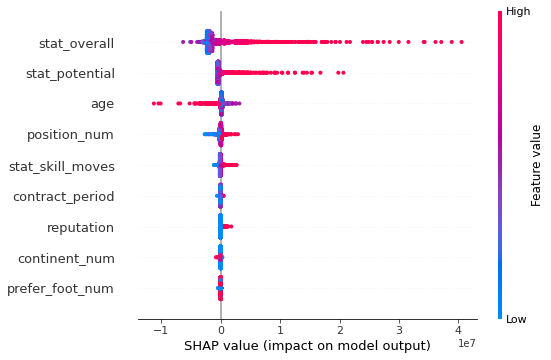

In [85]:
# CatBoost 모델로 진행

# from catboost import CatBoostRegressor
# cat_reg = CatBoostRegressor()
# cat_reg.fit(X_train, y_train)
# y_train_pred_cat = cat_reg.predict(X_train)
# y_test_pred_cat = cat_reg.predict(X_test)

import shap
explainer = shap.TreeExplainer(cat_reg)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

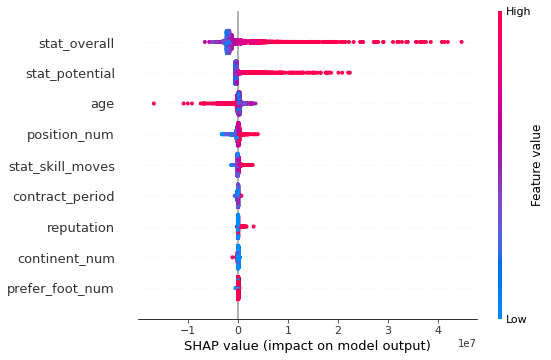

In [86]:
import shap
explainer = shap.TreeExplainer(cat_reg)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)